In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

# pickle savedata
def save_data(df, filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "wb" ) as file:
        pickle.dump(df, file)

# pickle load data
def load_data(filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "rb" ) as file:
        return pickle.load(file)
    
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [2]:
train = train.drop('Id', 1)
test = test.drop('Id', 1)

In [3]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [4]:
all_data = pd.concat([train, test], sort=False)

In [5]:
all_data = all_data.reset_index(drop=True)

In [6]:
all_data.shape

(2919, 80)

In [7]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Fill out NaN Values

In [8]:
num_col = all_data.select_dtypes(exclude='object').drop('SalePrice', 1).columns

In [9]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Correct false data of PoolQC

In [10]:
all_data.loc[(all_data['PoolArea']>0) & (all_data['PoolQC'].isnull()), ['OverallQual', 'PoolQC']]

,OverallQual,PoolQC
2420,4,NaN
2503,6,NaN
2599,3,NaN


In [11]:
all_data.loc[2420, 'PoolQC'] = 'Fa'
all_data.loc[2503, 'PoolQC'] = 'Gd'
all_data.loc[2599, 'PoolQC'] = 'Fa'

Correct false data of GarageYrBlt

In [12]:
all_data.loc[all_data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [13]:
all_data.loc[(all_data['GarageType'].notnull()) & (all_data['GarageYrBlt'].isnull()), 'YearRemodAdd']

2126    1983
2576    1999
Name: YearRemodAdd, dtype: int64

In [14]:
all_data.loc[2126, "GarageYrBlt"] = 1983.0
all_data.loc[2576, "GarageYrBlt"] = 1999.0

all_data.loc[2126, "GarageFinish"] = "RFn"
all_data.loc[2576, "GarageFinish"] = "Fin"

all_data.loc[[2126, 2576], ["GarageCond","GarageQual"]] = "TA"

all_data.loc[2576, "GarageCars"] = 2.0 #중앙값
all_data.loc[2576, "GarageArea"] = 480.0 #평균

In [15]:
all_data.loc[332, "BsmtFinType2"] = "Unf"

In [16]:
all_data.loc[2217, "BsmtQual"] = "Fa"
all_data.loc[2218, "BsmtQual"] = "Fa"

In [17]:
all_data.loc[948, "BsmtExposure"] = "Gd"
all_data.loc[1487, "BsmtExposure"] = "Av"
all_data.loc[2348, "BsmtExposure"] = "Mn"

In [18]:
all_data.loc[2040, "BsmtCond"] = "Gd"
all_data.loc[2185, "BsmtCond"] = "Fa"
all_data.loc[2524, "BsmtCond"] = "TA"

In [19]:
all_data.loc[773, "MasVnrArea"] = 0
all_data.loc[1230, "MasVnrArea"] = 0
all_data.loc[2452, "MasVnrArea"] = 0

In [20]:
all_data.loc[624, "MasVnrType"] = "BrkFace"
all_data.loc[1300, "MasVnrType"] = "BrkFace"
all_data.loc[1334, "MasVnrType"] = "BrkFace"
all_data.loc[1669, "MasVnrType"] = "Stone"
all_data.loc[2610, "MasVnrType"] = "BrkFace"

In [21]:
all_data.loc[1915, "MSZoning"] = "RL"
all_data.loc[2216, "MSZoning"] = "RL"
all_data.loc[2250, "MSZoning"] = "RL"
all_data.loc[2904, "MSZoning"] = "RL"

In [22]:
all_data.loc[2216, "Functional"] = "Maj1"
all_data.loc[2473, "Functional"] = "Maj1"

In [23]:
all_data.loc[1379, "Electrical"] = "SBrkr"

In [24]:
all_data.loc[1555, "KitchenQual"] = "TA"

In [25]:
all_data.loc[2151, "Exterior1st"] = "Plywood"
all_data.loc[2151, "Exterior2nd"] = "Plywood"

In [26]:
all_data.loc[2489, "SaleType"] = "WD"

In [27]:
all_data.loc[635, "TotRmsAbvGrd"] = 8

In [28]:
all_data.loc[873, "MiscVal"] = 4333
all_data.loc[1200, "MiscVal"] = 500
all_data.loc[2431, "MiscVal"] = 500
all_data.loc[2549, "MiscVal"] = 0

In [29]:
all_data.loc[1876, "YearRemodAdd"] = 2002.0

In [30]:
all_data.loc[523, "YrSold"] = 2008
all_data.loc[2295, "YrSold"] = 2008
all_data.loc[2549, "YrSold"] = 2009

In [31]:
num_nan_cols =[
    'MasVnrArea',
    'GarageYrBlt',
    'BsmtFullBath',
    'BsmtHalfBath',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'GarageCars',
    'GarageArea',
]

In [32]:
for col in num_nan_cols:
    all_data[col].fillna(train[col].mode()[0], inplace=True)

In [33]:
all_data[num_col].isnull().sum().sort_values(ascending=False).head()

YrSold          0
MoSold          0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

## Produce numerical col -> bool col

In [34]:
all_data['WoodDeckSF_bool'] = all_data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

all_data['OpenPorchSF_bool'] = all_data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

all_data['EnclosedPorch_bool'] = all_data['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['3SsnPorch_bool'] = all_data['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['ScreenPorch_bool'] = all_data['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)

all_data['PoolArea_bool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

all_data['FirePlaces_bool'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Outliers

In [35]:
t_col = [
    'GrLivArea',
    'TotalBsmtSF',
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
]

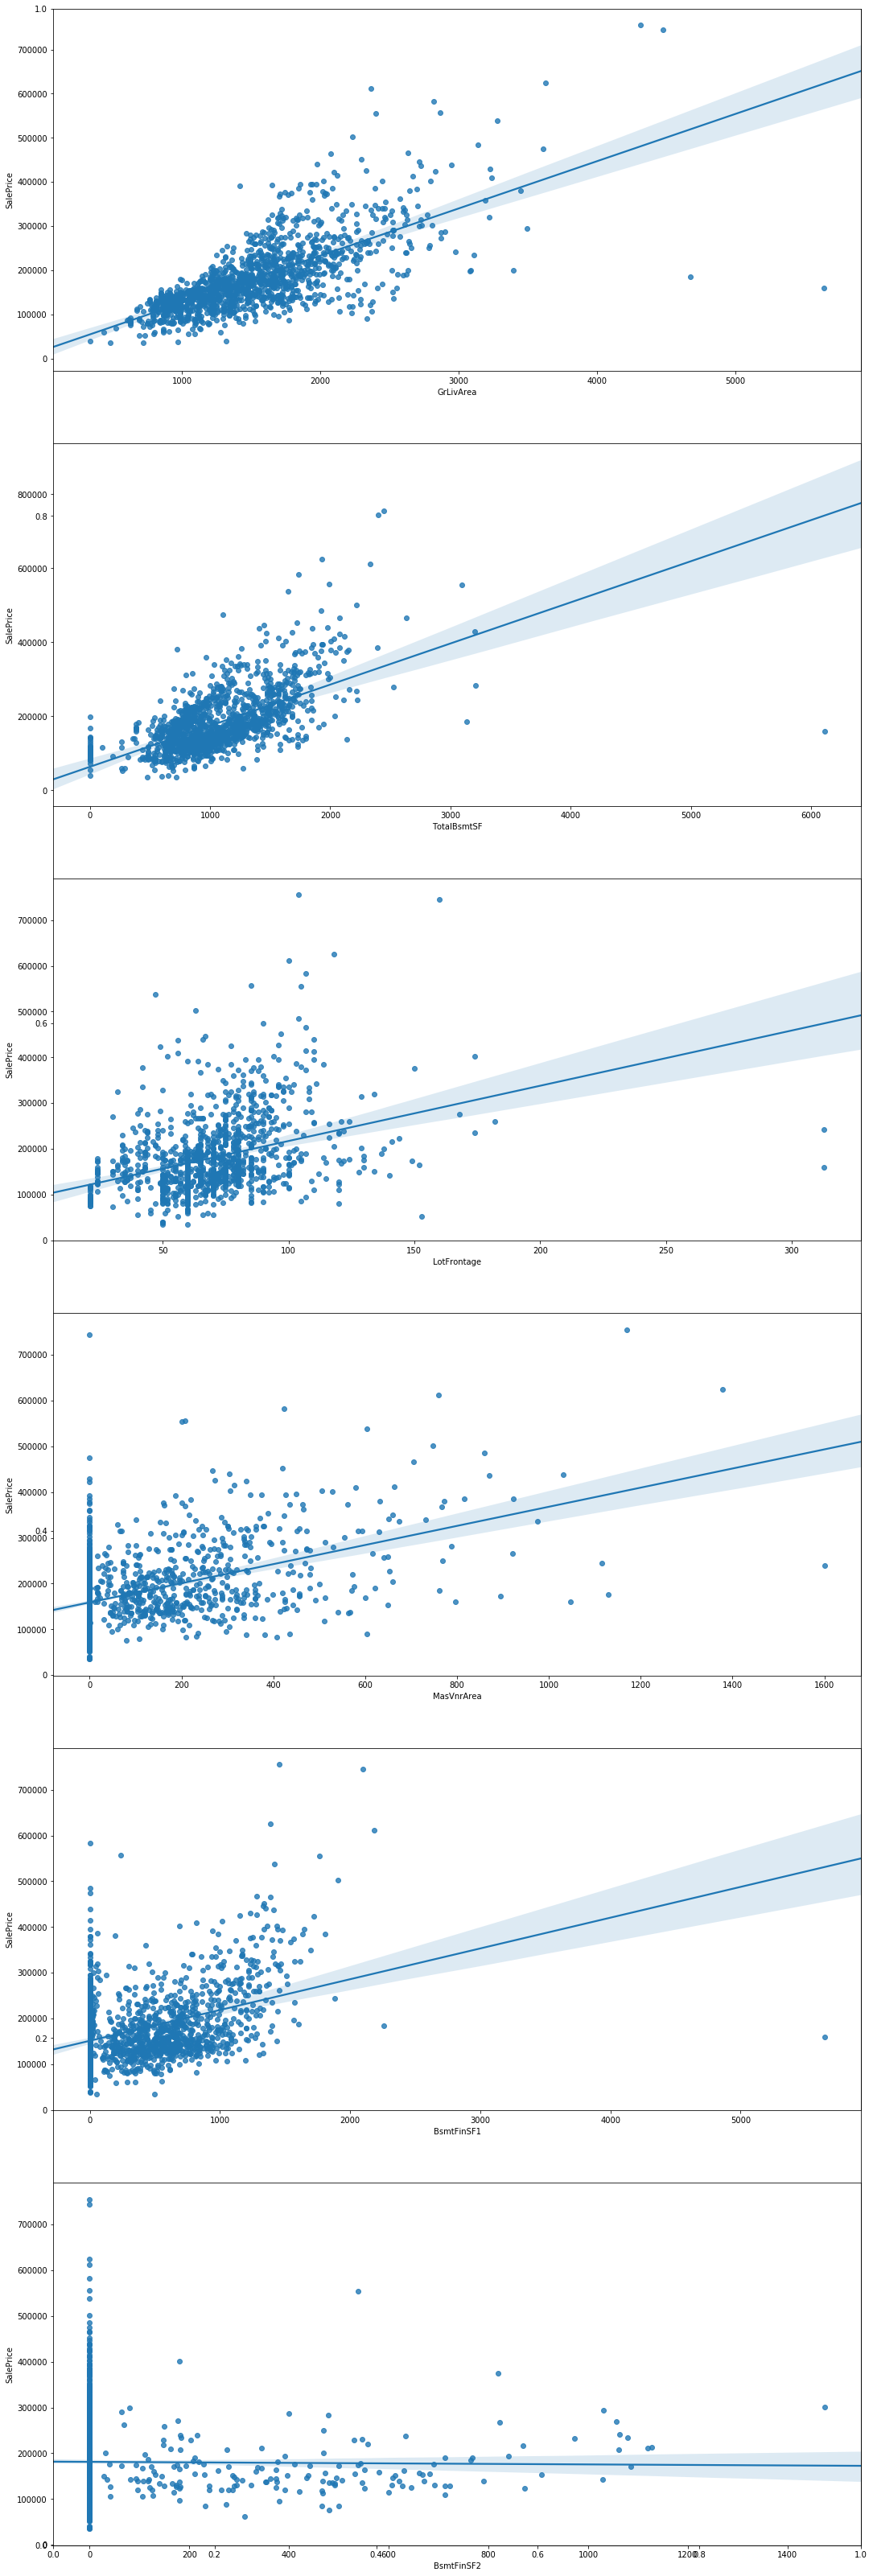

In [36]:
fg, ax = plt.subplots(figsize=(18, 58))
for i, c in enumerate(t_col):
    fg.add_subplot(6, 1, i+1)
    sns.regplot(x=train[c], y=train['SalePrice'])

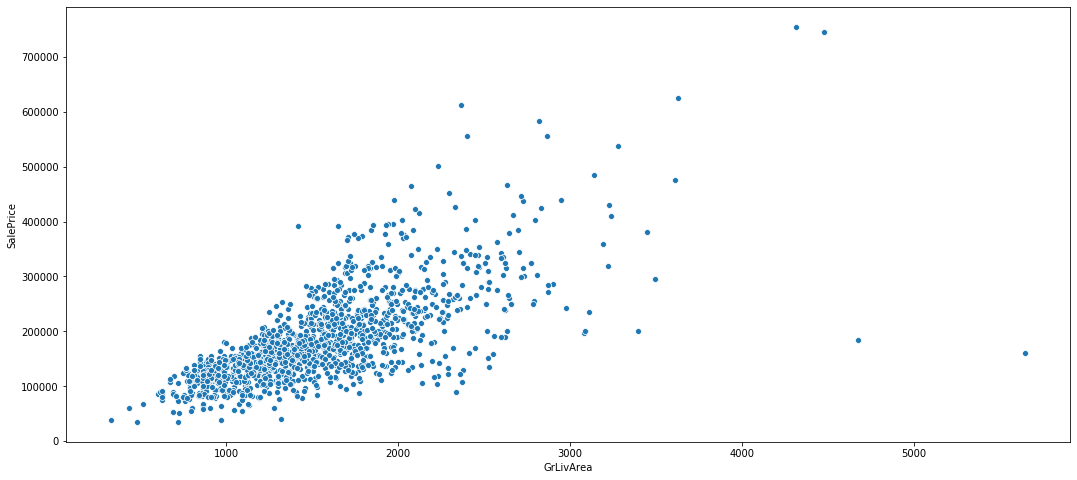

In [37]:
plt.figure(figsize=(18, 8))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])

In [38]:
# train = train.loc[train['SalePrice'] < 700000, :]

In [39]:
# train = train.loc[train['TotalBsmtSF'] < 3000, :]

In [40]:
# train = train.loc[train['LotFrontage'] < 210, :]

In [41]:
# train = train.loc[train['MasVnrArea'] < 1300, :]

In [42]:
# train = train.loc[train['BsmtFinSF1'] < 2000, :]

In [43]:
# train = train.loc[train['BsmtFinSF2'] < 1200, :]

In [44]:
len(num_col)

36

## Explore Categorical Data

In [45]:
cat_col = all_data.select_dtypes(include='object').columns

In [46]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [47]:
len(cat_col), len(num_col)

(43, 36)

## Explore NaN Values

In [48]:
cat_nan_col = [col for col in cat_col if all_data[col].isnull().sum() > 0]

In [49]:
for col in cat_nan_col:
    all_data[col].fillna('None', inplace=True)

## Produce bool column

**bool**
* Alley
* MiscFeature

In [50]:
all_data['Alley_bool'] = all_data['Alley'].apply(lambda x: 0 if x == 'None' else 1)

In [51]:
all_data['MiscFeature_bool'] = all_data['MiscFeature'].apply(lambda x: 0 if x == 'None' else 1)

## Produce clean column

**clean**
* Electrical
* Functional
* RoofMatl
* GarageQual
* Exterior1st
* Exterior2nd
* SaleType

In [52]:
all_data['Electrical_clean'] = all_data['Electrical'].apply(lambda x: x if x == 'SBrkr' else 'Fuse')

In [53]:
all_data['Functional_clean'] = all_data['Functional'].apply(lambda x: x if x =='Typ' else 'Other')

In [54]:
all_data['RoofMatl_clean'] = all_data['RoofMatl'].apply(lambda x: x if x == 'CompShg' else 'Other')

In [55]:
all_data['GarageQual_clean'] = all_data['GarageQual'].apply(lambda x: x if x == 'TA' else 'Other')

In [56]:
ext_other = [
    'Stone',
    'AsphShn',
    'Other',
    'CBlock',
    'ImStucc',
    'Brk Cmn',
    'BrkComm',
    'None',
]

In [57]:
all_data['Exterior1st_clean'] = all_data['Exterior1st'].apply(lambda x: 'Other' if x in ext_other else x)

In [58]:
all_data['Exterior2nd_clean'] = all_data['Exterior2nd'].apply(lambda x: 'Other' if x in ext_other else x)

In [59]:
saletype_other = [
    'ConLD',
    'ConLw',
    'ConLI',
    'CWD',
    'Oth',
    'Con',
    'None'
]

In [60]:
all_data['SaleType_clean'] = all_data['SaleType'].apply(lambda x: x if x not in saletype_other else 'Other')

## Add Column (Further Tuning)

In [61]:
all_data['LotArea_log'] = np.log1p(all_data['LotArea'])

In [62]:
all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] = all_data['GrLivArea'] + all_data['TotalBsmtSF'] +all_data['GarageArea']
all_data['LotArea_log_GTGs_mul'] = all_data['LotArea_log'] * all_data['GrLivArea_TotalBsmtSF_GarageArea_sum']

## Sum cols

In [63]:
all_data['OtherArea'] = all_data['WoodDeckSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

In [64]:
all_data['Total_sqr_area'] = all_data['BsmtFinSF1'] \
                            + all_data['BsmtFinSF2'] \
                            + all_data['1stFlrSF'] \
                            + all_data['2ndFlrSF']

In [65]:
all_data['FullBath_count'] = all_data['BsmtFullBath'] + all_data['FullBath']
all_data['HalfBath_count'] = all_data['HalfBath'] + all_data['BsmtHalfBath']

## Mean cols

In [66]:
all_data['Overall_sum'] = all_data['OverallCond']+ all_data['OverallQual']

## Mul cols

In [67]:
all_data['GrLivArea_OverallQual_mul'] = all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] * all_data['OverallQual'].astype(int)

In [68]:
all_data['GrLivArea_OverallCond_mul'] = all_data['GrLivArea_TotalBsmtSF_GarageArea_sum'] * all_data['OverallCond'].astype(int)

## Check Up Values

In [69]:
cat_col = train.select_dtypes(include='object').columns

In [70]:
for col in cat_col:
    print("[Column Name] {0}".format(col))
    print(train[col].value_counts())
    print("----"*3)

[Column Name] MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
------------
[Column Name] Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
------------
[Column Name] Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
------------
[Column Name] LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
------------
[Column Name] LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
------------
[Column Name] Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
------------
[Column Name] LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
------------
[Column Name] LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
------------
[Column Name] Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert   

In [71]:
all_data.isnull().sum().sort_values(ascending=False).head()

SalePrice     1459
MasVnrArea       0
ExterCond        0
Foundation       0
BsmtQual         0
dtype: int64

## Save Data

In [72]:
to_remove = [
    'Utilities',
    'Street',
    'SalePrice',
    'PoolQC',
    'Id',
]

save_data(to_remove, 'to_remove')

In [73]:
save_data(train, 'train-clean-final')
save_data(test, 'test-clean-final')

## Finish Up

In [74]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')

In [75]:
cat_cols = all_data.select_dtypes(include='object').columns

In [76]:
all_data.shape

(2919, 106)

In [77]:
len(train)

1460

In [78]:
train = all_data[:len(train)]
test = all_data[len(train):]

In [79]:
train['GrLivArea'].sort_values(ascending=False)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
        ... 
528      605
29       520
916      480
1100     438
533      334
Name: GrLivArea, Length: 1460, dtype: int64

In [80]:
train = train.drop([1298, 523])

In [81]:
[30, 88, 462, 631, 1322]

[30, 88, 462, 631, 1322]

In [82]:
train.shape, test.shape

((1458, 106), (1459, 106))

In [83]:
save_data(train, 'train-clean-final')
save_data(test, 'test-clean-final')

## Drop Columns

In [84]:
bool_remove = [
    'Alley',
    'MiscFeature',
]

In [85]:
clean_remove = [
    'Electrical',
    'Functional',
    'RoofMatl',
    'GarageQual',
    'Exterior1st',
    'Exterior2nd',
    'SaleType',
]

In [86]:
log_remove = [
    'LotArea',
]

In [87]:
useless_remove = [
    'Utilities',
    'Street',
    'SalePrice',
    'PoolQC',
    'Id',
]

In [88]:
to_remove = bool_remove + clean_remove + log_remove + useless_remove

In [89]:
to_remove = useless_remove

In [90]:
save_data(to_remove, 'to_remove')

## Removing Unuse cols

In [91]:
use_col = [col for col in train.columns if col not in to_remove]

In [92]:
train_copy = train.copy()
test_copy = test.copy()

In [93]:
train_copy = train_copy[use_col]
test_copy = test_copy[use_col]

## One Hot Encoding

In [94]:
all_data = pd.concat([train_copy, test_copy], sort=False)

In [95]:
all_data = pd.get_dummies(all_data)

In [96]:
overfit = {}
for col in all_data.columns:
    counts = all_data[col].value_counts()
    zeros = counts.iloc[0]
    zero_pct = zeros / len(all_data) * 100
    overfit[col] = zero_pct

In [97]:
zdf = pd.DataFrame(data=overfit.values(), index=overfit.keys(), columns=['zeros'])
zdf.sort_values('zeros', ascending=False)

,zeros
RoofMatl_Membran,99.965718
Electrical_Mix,99.965718
Condition2_RRAn,99.965718
MSSubClass_150,99.965718
Condition2_RRAe,99.965718
...,...
GrLivArea_TotalBsmtSF_GarageArea_sum,0.479945
GrLivArea_OverallCond_mul,0.445663
Total_sqr_area,0.445663
GrLivArea_OverallQual_mul,0.445663


In [98]:
drop_idx = zdf.loc[zdf['zeros'] > 99].index

In [99]:
features = [col for col in all_data.columns if col not in drop_idx]

In [100]:
all_data = all_data[features]

In [101]:
all_data.shape

(2917, 271)

In [102]:
all_data.fillna(0, inplace=True)

In [103]:
x_train = all_data[:len(train_copy)]
x_test = all_data[len(train_copy):]

In [104]:
x_train.shape, x_test.shape

((1458, 271), (1459, 271))

In [105]:
y_train = np.log1p(train['SalePrice'])

## Scoring

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [107]:
x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, random_state=30)

In [108]:
def get_score(model):
    pred = model.fit(x_tr, y_tr).predict(x_te)
    return np.sqrt(mean_squared_error(np.expm1(pred), np.expm1(y_te)))

## Modeling

In [113]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingCVRegressor

In [110]:
kf = KFold(random_state=30, 
           n_splits=10, 
           shuffle=True)

In [111]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [112]:
ridgeCV = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kf))
lassoCV = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))
elasticnetCV = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [113]:
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
print("lgbm   : {0:.2f}, ".format(get_score(lgbm)))

lgbm   : 25770.99, 


In [115]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [119]:
dtrain = xgb.DMatrix(x_tr, y_tr)

In [120]:
dvalid = xgb.DMatrix(x_te, y_te)

In [121]:
def score(params):
    

AttributeError: 'DMatrix' object has no attribute 'shape'

In [ ]:
print("xgb   : {0:.2f}, ".format(get_score(xgb)))

In [116]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)   
print("gbr   : {0:.2f}, ".format(get_score(gbr)))

gbr   : 25587.25, 


In [117]:
stack_reg = StackingCVRegressor(regressors=(ridgeCV, lassoCV, elasticnetCV, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True, n_jobs=-1)

## Evaluation

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
def print_score(model, name):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring='neg_mean_squared_error', 
                             cv=10
                            )
    print("model: {0} =====> mean: {1:.3f}, std: {2:.3f}, score: {3:.3f}".format(name, np.sqrt(-scores).mean(), np.sqrt(-scores).std(), 
                                                                 get_score(model))
         )

In [120]:
print_score(lassoCV, 'lassoCV')
print_score(elasticnetCV, 'elasticnetCV')
print_score(ridgeCV, 'ridgeCV')
print_score(lgbm, 'lgbm')
print_score(xgb, 'xgb')
print_score(gbr, 'gbr')

model: lassoCV =====> mean: 0.111, std: 0.016, score: 21104.086
model: elasticnetCV =====> mean: 0.111, std: 0.016, score: 21104.086
model: ridgeCV =====> mean: 0.112, std: 0.015, score: 21504.610
model: lgbm =====> mean: 0.113, std: 0.016, score: 25770.993
model: xgb =====> mean: 0.113, std: 0.017, score: 25297.284
model: gbr =====> mean: 0.113, std: 0.017, score: 25587.253


In [121]:
models = {
    'lassoCV': lassoCV,
    'ridgeCV': ridgeCV,
    'elasticnetCV': elasticnetCV,
    'lgbm': lgbm,
    'xgb': xgb,
    'gbr': gbr,
    'stack_reg': stack_reg,
}

In [122]:
lassoCV_pred = lassoCV.fit(x_train, y_train).predict(x_test)
lassoCV_pred = np.expm1(lassoCV_pred)

In [123]:
ridgeCV_pred = ridgeCV.fit(x_train, y_train).predict(x_test)
ridgeCV_pred = np.expm1(ridgeCV_pred)

In [124]:
elasticnetCV_pred = elasticnetCV.fit(x_train, y_train).predict(x_test)
elasticnetCV_pred = np.expm1(elasticnetCV_pred)

In [125]:
lgbm_pred = lgbm.fit(x_train, y_train).predict(x_test)
lgbm_pred = np.expm1(lgbm_pred)

In [126]:
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
xgb_pred = np.expm1(xgb_pred)

In [127]:
gbr_pred = gbr.fit(x_train, y_train).predict(x_test)
gbr_pred = np.expm1(gbr_pred)

In [128]:
svr_pred = svr.fit(x_train, y_train).predict(x_test)
svr_pred = np.expm1(svr_pred)

In [129]:
stack_pred = stack_reg.fit(np.array(x_train), np.array(y_train)).predict(np.array(x_test))
stack_pred = np.expm1(stack_pred)

In [137]:
prediction = ((0.1 * elasticnetCV_pred) + \
            (0.05 * lassoCV_pred) + \
            (0.1 * ridgeCV_pred) + \
            (0.1 * svr_pred) + \
            (0.1 * gbr_pred) + \
            (0.15 * xgb_pred) + \
            (0.05 * lgbm_pred) + \
            (0.35 * stack_pred))

In [138]:
# print(np.sqrt(((prediction - target)**2).mean()).round(2))
print(prediction[1089].round(2))
# 999506.93 <=== BEST SCORED OUTLIER
# scored: 12313

966824.23


In [139]:
from datetime import datetime

t = datetime.now().strftime('%Y-%m-%d-%H-%M')
filename = '{0}-submission.csv'.format(t)

In [140]:
sample_submission['SalePrice'] = prediction

In [141]:
sample_submission.to_csv(filename, index=False)